### Homework 2

#### Instructions:

Apply the logistic regression Machine Learning workflow as we have seen it until now to a simplified version I made of the adult income dataset https://www.kaggle.com/datasets/uciml/adult-census-income/. Name of the file (to be found in the homework directory)is adult_small.csv. 

Take care of 
- handling missing values or duplicated rows
- making sex, race, and income numeric
- scaling

Name:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn 
print(sklearn.__version__)

1.2.2


### 1. Load and analyze the data

In [6]:
adult = pd.read_csv("adult_small.csv")

In [7]:
adult.head()

,age,education.num,race,sex,hours.per.week,income
0,51,13,White,Female,40,>50K
1,18,6,White,Male,40,<=50K
2,50,9,White,Male,40,<=50K
3,32,9,Black,Female,40,<=50K
4,35,9,White,Male,48,<=50K


In [8]:
len(adult)

4922

In [9]:
# Duplicates?
adult.duplicated().sum()

1620

In [10]:
adult.drop_duplicates(inplace=True)

In [11]:
len(adult)

3302

In [12]:
# Missing values?
adult.isnull().sum()

age               0
education.num     0
race              0
sex               0
hours.per.week    0
income            0
dtype: int64

In [13]:
adult.sex.value_counts()

sex
Male      2151
Female    1151
Name: count, dtype: int64

In [14]:
adult.race.value_counts()

race
White                 2746
Black                  409
Asian-Pac-Islander     147
Name: count, dtype: int64

In [15]:
adult.income.value_counts(normalize=True)

income
<=50K    0.725015
>50K     0.274985
Name: proportion, dtype: float64

In [16]:
# Make nominal features numeric

adult.sex.replace({'Male': 0,'Female': 1}, inplace=True)
adult.race.replace({'White': 0,'Black': 1,'Asian-Pac-Islander': 2}, inplace=True)
adult.income.replace({'<=50K': 0,'>50K': 1}, inplace=True)

In [17]:
adult.corr()['income']

age               0.173661
education.num     0.352238
race             -0.070045
sex              -0.214226
hours.per.week    0.243912
income            1.000000
Name: income, dtype: float64

### 2. Set up train and test

In [19]:
from sklearn.model_selection import train_test_split

X = adult.drop(columns=['income'])
y = adult['income']

X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2641, 5) (2641,) (661, 5) (661,)


In [20]:
# Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. Model Construction

In [22]:
from sklearn.linear_model import LogisticRegression  

logreg = LogisticRegression(random_state=42) 

In [23]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=42)

### 4. Model Evaluation

              precision    recall  f1-score   support

           0       0.81      0.94      0.87       481
           1       0.70      0.41      0.52       180

    accuracy                           0.79       661
   macro avg       0.76      0.67      0.69       661
weighted avg       0.78      0.79      0.77       661



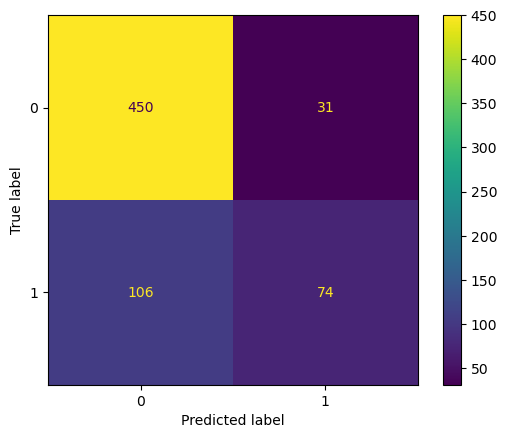

In [25]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

y_test_pred = logreg.predict(X_test) # predict output for the test data

print(classification_report(y_test, y_test_pred)) # evaluate how well the model did

ConfusionMatrixDisplay.from_predictions(y_test, y_test_pred)


Conlusion: add your insights from the experiment briefly